Multivariate Logistic Regression Implementation

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
def initialization(lenw):
    w = np.random.randn(1, lenw)
    b = 0
    return w, b

In [25]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [26]:
def forward(x, w, b):
    z = np.dot(w, x) + b
    a = sigmoid(z)
    return a

In [27]:
def cost(a, y):
    m = y.shape[1]
    epsilon = 1e-15  
    j = -(1/m) * np.sum(y * np.log(a + epsilon) + (1 - y) * np.log(1 - a + epsilon))
    return j

In [28]:
def backpropagation(x, y, a):
    m = x.shape[1]
    dz = a - y  
    dw = (1/m) * np.dot(dz, x.T)
    db = (1/m) * np.sum(dz)
    return dw, db

In [29]:
def gradient(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

In [30]:
# Load dataset
data = load_breast_cancer()
X = data.data      
y = data.target    

# Standardize the features for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.T

# Reshape y to have shape (1, m)
y = y.reshape(1, -1)

# Split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled.T, y.T, test_size=0.2, random_state=42)
X_train = X_train.T  
X_test = X_test.T   
y_train = y_train.T 
y_test = y_test.T 

In [31]:
n_features = X_train.shape[0]
w, b = initialization(n_features)

lr= 0.01
n_iterations = 1000
costs= []

for i in range(n_iterations+1):
    a = forward(X_train, w, b)  
    j = cost(a, y_train)
    costs.append(j)
    dw, db = backpropagation(X_train, y_train, a)
    w, b = gradient(w, b, dw, db, lr)
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {j}")

print("\nLearned parameters:")
print("Weights:", w)
print("Bias:", b)

Iteration 0: Cost = 3.5354722364524287
Iteration 100: Cost = 0.8446876402515909
Iteration 200: Cost = 0.5055012752489609
Iteration 300: Cost = 0.38716950058684346
Iteration 400: Cost = 0.3214309030263997
Iteration 500: Cost = 0.27772638132801103
Iteration 600: Cost = 0.24567934659277632
Iteration 700: Cost = 0.22097063855080962
Iteration 800: Cost = 0.20126231841426265
Iteration 900: Cost = 0.1851068609586031
Iteration 1000: Cost = 0.17156680367894997

Learned parameters:
Weights: [[-1.02729336  0.55553561 -0.56410437 -0.91320882 -1.63717505  1.80407154
  -1.17196311 -0.80433422 -0.17170889  1.40322582  0.41354757 -0.68241015
  -1.19581107 -0.43794496  1.0091272   0.45212863 -0.32304662 -0.07989744
   0.28171524 -0.36519775  1.35149542 -0.86557655  0.2444073  -0.17050752
  -0.20285726 -0.33211581 -1.22458235 -1.23786392 -0.14458542 -0.05975851]]
Bias: 0.5334826166492086


In [32]:
#testing
a_test = forward(X_test, w, b)
test_cost = cost(a_test, y_test)
print("\nTest set cost:", test_cost)


Test set cost: 0.13794596707475518


In [33]:
# Converting predicted probabilities to binary predictions using 0.5 threshold
predictions = (a_test >= 0.5).astype(int)

# Computing accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Test set accuracy: {:.2f}%".format(accuracy))

Test set accuracy: 93.86%


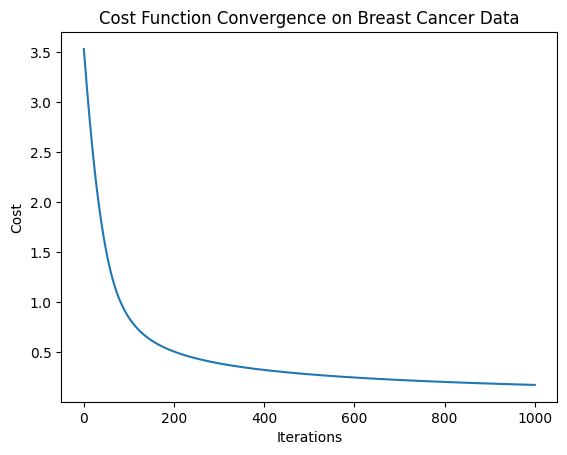

In [34]:
# Plotting
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence on Breast Cancer Data")
plt.show()
